In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import glob

### Human proportion in the image

In [3]:
base_dir = "../dataset/selfie/training/"
mask_list = [s for s in os.listdir(base_dir) if s.split('.')[0][-5:] == "matte"]

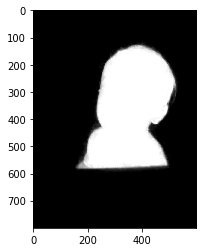

In [5]:
# mask_path = np.random.choice(img_list)
mask_path = mask_list[861]
mask = cv2.imread(os.path.join(base_dir, mask_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, "gray")

In [6]:
def get_human_ratio(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    h, w = mask.shape
    human_ratio = 1 - (np.unique(mask, return_counts=True)[1][0] / (h * w))
    return human_ratio

In [8]:
train_dir = "../dataset/selfie/training/"
test_dir  = "../dataset/selfie/testing/"
train_mask_list = [os.path.join(train_dir, s) for s in os.listdir(train_dir) if s.split('.')[0][-5:] == "matte"]
test_mask_list  = [os.path.join(test_dir, s) for s in os.listdir(test_dir) if s.split('.')[0][-5:] == "matte"]

human_ratio_train = list(map(get_human_ratio, train_mask_list))
human_ratio_test  = list(map(get_human_ratio, test_mask_list))

In [9]:
human_ratio_train[:10]

[0.759675,
 0.6466041666666666,
 0.7213541666666667,
 0.5001541666666667,
 0.6205104166666666,
 0.45774375,
 0.3444041666666666,
 0.5832291666666667,
 0.6167208333333334,
 0.7633291666666666]

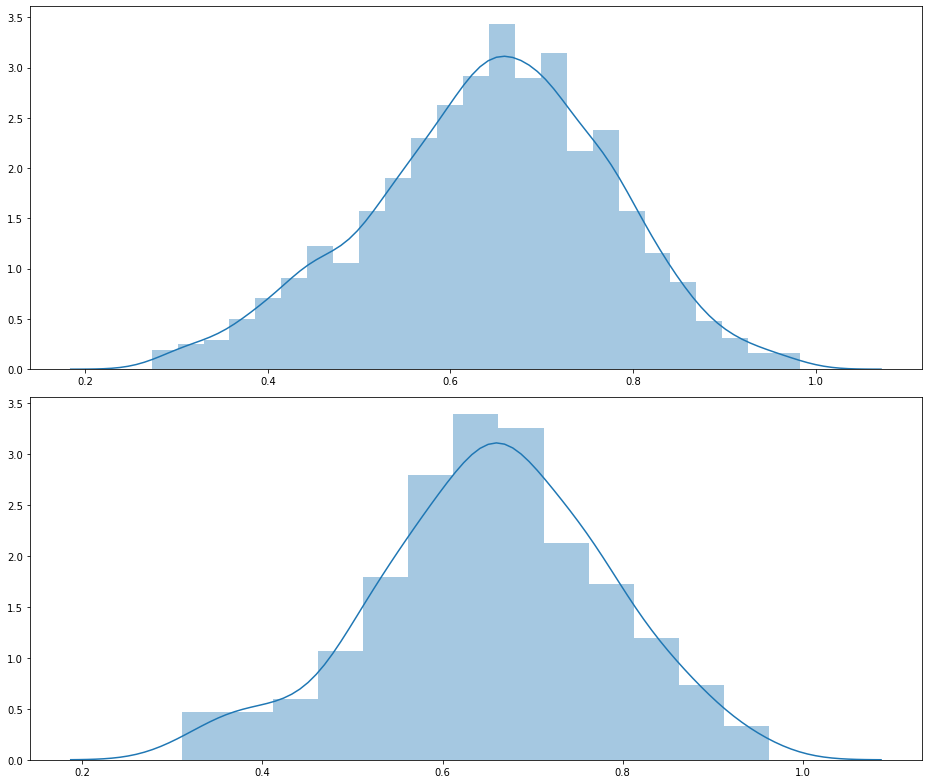

In [309]:
plt.figure(figsize=(13,11))

plt.subplot(211)
sns.distplot(human_ratio_train)
plt.subplot(212)
sns.distplot(human_ratio_test)

plt.tight_layout()
plt.show()

In [10]:
human_ratio_whole = human_ratio_test + human_ratio_train

max(human_ratio_whole), min(human_ratio_whole)

(0.983175, 0.2727166666666667)

In [315]:
human_ratio_train.index(0.2727166666666667)

861